<a href="https://colab.research.google.com/github/sauravkb94/Flawtrick/blob/main/Urbansound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [2]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!dir


drive  sample_data


In [8]:
!ls 

drive  sample_data


In [9]:
filename='/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'


In [10]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

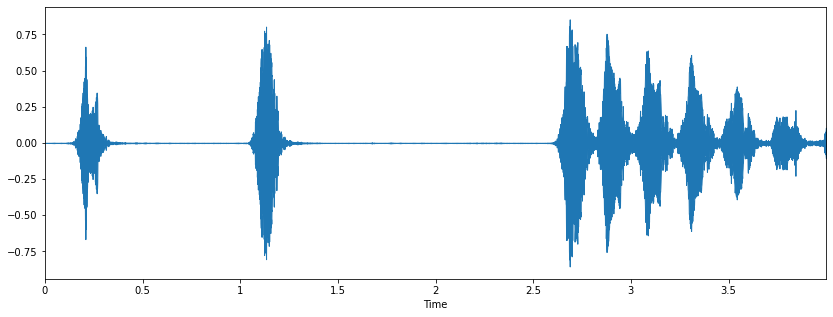

In [11]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [12]:
sample_rate

22050

In [13]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [14]:
wave_sample_rate

48000

In [15]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [16]:
data


array([-0.00011662, -0.00017163, -0.00017833, ..., -0.04541198,
       -0.04675572, -0.05040179], dtype=float32)

##sound 

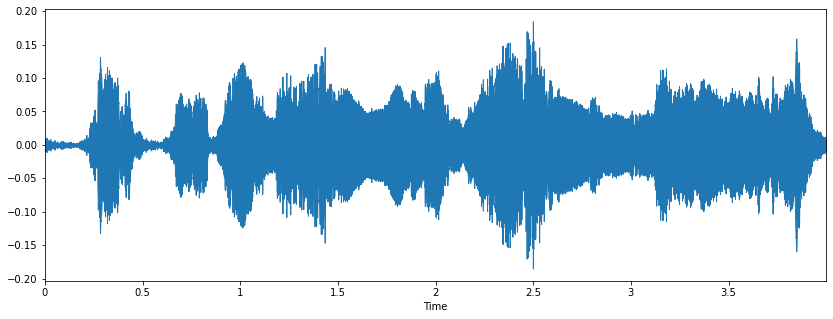

In [32]:
### Sound
filename='/content/drive/MyDrive/UrbanSound8K/children_playing.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [17]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [18]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

Audio Classification Data Preprocessing

In [19]:
import pandas as pd
import os
import librosa
import numpy as np

In [36]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/children_playing.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [37]:
print(librosa_audio_data)

[-4.3675750e-03 -6.6540381e-03 -6.1810762e-03 ... -2.2558534e-05
  3.2895268e-03  5.7578729e-03]


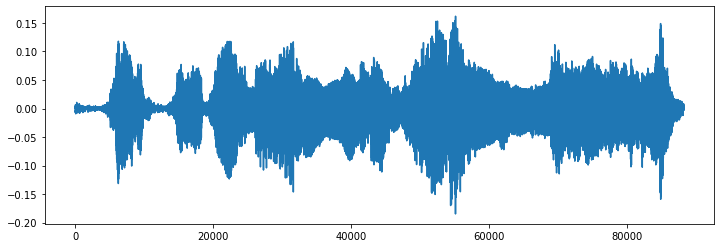

In [38]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Observation

Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [39]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [40]:
wave_audio

array([[-21670912,  -5170944],
       [-19522304,  -5430016],
       [-20220672,  -7290368],
       ...,
       [ 15947264,   5305344],
       [ 21581056,   3250944],
       [ 22847744,    349696]], dtype=int32)

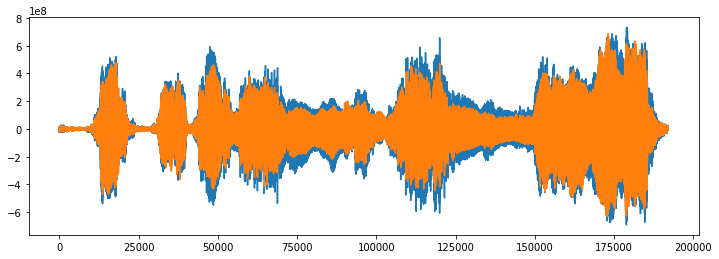

In [41]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extract Features

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [42]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [43]:
mfccs

array([[-4.44957642e+02, -4.48515045e+02, -4.74609955e+02, ...,
        -3.46405487e+02, -3.74138977e+02, -3.90002258e+02],
       [ 1.11589401e+02,  1.10134338e+02,  9.26177292e+01, ...,
         1.06499535e+02,  1.09490051e+02,  1.00191956e+02],
       [ 1.11435719e+01,  1.39044971e+01,  8.36745834e+00, ...,
        -2.36316795e+01, -1.21054287e+01, -5.00175381e+00],
       ...,
       [ 3.14199895e-01,  2.33451486e+00,  7.52234173e+00, ...,
        -1.81309426e+00,  3.73178339e+00,  6.22568274e+00],
       [ 5.01671648e+00,  5.20635891e+00,  4.73174095e+00, ...,
        -6.75824165e+00,  1.08956420e+00,  3.82792091e+00],
       [-7.31430054e-01, -1.19464731e+00, -3.23717022e+00, ...,
        -3.17134690e+00, -2.95346308e+00, -3.06791353e+00]], dtype=float32)

In [44]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [45]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [47]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients

In [48]:
import numpy as np
from tqdm import tqdm

In [49]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [27:34,  1.98it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [1:03:49,  2.27it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [1:03:50,  2.51it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [1:06:50,  2.18it/s]


In [50]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [51]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [52]:
X.shape

(8732, 40)

In [53]:
### Label Encoding
y=np.array(pd.get_dummies(y))

In [55]:
y.shape;

In [56]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
X_train;

In [59]:
X_train.shape

(6985, 40)

In [60]:
X_test.shape

(1747, 40)

In [61]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [62]:
y_train.shape

(6985, 10)

In [63]:
y_test.shape

(1747, 10)

Model Creation

In [66]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from keras.optimizer_v1 import Adam
from keras.callbacks import TensorBoard


In [67]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [73]:
cnn.add(Flatten())
cnn.add(Dropout(0.3))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))

In [74]:
cnn.add(Dense(num_labels, activation='sigmoid'))

In [75]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 32)            96        
                                                                 
 dropout (Dropout)           (None, 39, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 64)            4160      
                                                                 
 dropout_1 (Dropout)         (None, 38, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 128)           16512     
                                                                 
 dropout_2 (Dropout)         (None, 37, 128)           0         
                                                                 
 flatten (Flatten)           (None, 4736)              0

In [76]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [77]:
## Trianing my model
epochs = 100
batch_size = 32
history = cnn.fit(X_train , y_train , verbose=1 , batch_size=batch_size , epochs=epochs ,validation_data=(X_test, y_test) )

Epoch 1/100
219/219 [==============================] - 8s 32ms/step - loss: 2.6156 - accuracy: 0.1329 - val_loss: 2.2806 - val_accuracy: 0.1236
Epoch 2/100
219/219 [==============================] - 5s 22ms/step - loss: 2.2614 - accuracy: 0.1467 - val_loss: 2.2391 - val_accuracy: 0.1740
Epoch 3/100
219/219 [==============================] - 5s 22ms/step - loss: 2.2152 - accuracy: 0.1639 - val_loss: 2.2059 - val_accuracy: 0.1952
Epoch 4/100
219/219 [==============================] - 5s 23ms/step - loss: 2.1765 - accuracy: 0.1719 - val_loss: 2.1402 - val_accuracy: 0.2599
Epoch 5/100
219/219 [==============================] - 5s 23ms/step - loss: 2.1332 - accuracy: 0.2102 - val_loss: 2.0280 - val_accuracy: 0.2622
Epoch 6/100
219/219 [==============================] - 5s 22ms/step - loss: 2.0479 - accuracy: 0.2408 - val_loss: 1.8655 - val_accuracy: 0.3429
Epoch 7/100
219/219 [==============================] - 5s 22ms/step - loss: 1.9797 - accuracy: 0.2782 - val_loss: 1.8410 - val_accuracy:

In [83]:
test_accuracy= cnn.evaluate(X_test, y_test,verbose=0)
print(test_accuracy[1])

0.8425872921943665


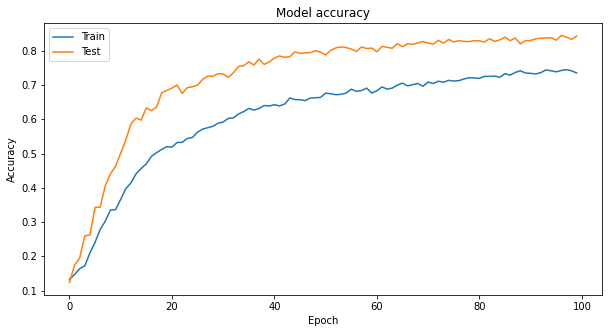

In [84]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("acc.png")
plt.show()

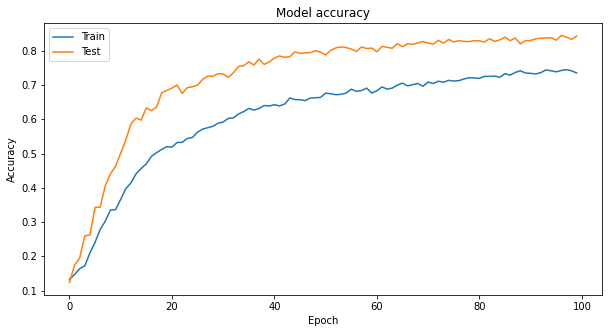

In [85]:
fig, ax1 = plt.subplots(figsize= (10, 5) )
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("acc.png")
plt.show()

In [86]:
test_accuracy = cnn.evaluate(X_test, y_test, verbose = 1)
print(test_accuracy[1]*100)

55/55 [==============================] - 1s 8ms/step - loss: 0.5219 - accuracy: 0.8426
84.25872921943665


In [87]:
filename="/content/drive/MyDrive/UrbanSound8K/Drilling.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [88]:
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
#predicted_label=model.predict_classes(mfccs_scaled_features)
y_pred = cnn.predict(mfccs_scaled_features)
predicted_label = np.round(y_pred).astype(int)
print(predicted_label)

[-72.20722    -18.295094   -66.61394    -43.12368    -58.37158
 -17.464151   -39.412758    -1.4693531  -24.889866     3.6633902
 -26.83166      3.6152012  -13.316872    11.204119   -15.435302
  10.183188   -10.696394     6.09065    -12.251776     3.7592795
 -10.086111     6.6034484   -9.0293665    5.0210667   -5.528391
   5.3949795   -4.102557     6.510079    -3.9134302    5.1459255
  -4.0938554    4.5636764   -1.9757221    2.9333746   -4.9971294
   3.6087234   -0.12153833   2.89481     -1.6078744    3.125875  ]
[[-72.20722    -18.295094   -66.61394    -43.12368    -58.37158
  -17.464151   -39.412758    -1.4693531  -24.889866     3.6633902
  -26.83166      3.6152012  -13.316872    11.204119   -15.435302
   10.183188   -10.696394     6.09065    -12.251776     3.7592795
  -10.086111     6.6034484   -9.0293665    5.0210667   -5.528391
    5.3949795   -4.102557     6.510079    -3.9134302    5.1459255
   -4.0938554    4.5636764   -1.9757221    2.9333746   -4.9971294
    3.6087234   -0.12153

In [89]:
if(predicted_label[0][0] == 1):
	print("Air Conditioner")
elif(predicted_label[0][1] == 1):
	print("Car Horn")
elif(predicted_label[0][2] == 1):
	print("Children Playing")
elif(predicted_label[0][3] == 1):
	print("Dog Bark")	
elif(predicted_label[0][4] == 1):
	print("Drilling")	
elif(predicted_label[0][5] == 1):
	print("engine_idling")	
elif(predicted_label[0][6] == 1):
	print("Gun Shot")	
elif(predicted_label[0][7] == 1):
	print("Jack Hammer")
elif(predicted_label[0][8] == 1):
	print("Siren")
elif(predicted_label[0][9] == 1):
	print("Street Music")

Drilling


# Commented out IPython magic to ensure Python compatibility.

In [90]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,accuracy_score

In [91]:
rf = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

In [92]:
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Accuracy of Random Forest: 65.31196336576988 

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       195
           1       1.00      0.49      0.66        91
           2       0.96      0.42      0.58       205
           3       0.97      0.57      0.72       182
           4       0.97      0.74      0.84       202
           5       1.00      0.84      0.91       216
           6       1.00      0.56      0.72        87
           7       0.95      0.84      0.89       187
           8       0.99      0.73      0.84       199
           9       0.94      0.33      0.49       183

   micro avg       0.98      0.65      0.78      1747
   macro avg       0.98      0.64      0.76      1747
weighted avg       0.98      0.65      0.77      1747
 samples avg       0.65      0.65      0.65      1747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [97]:
knn_acc_score = accuracy_score(y_test, y_pred_knn)

In [98]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [101]:
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [102]:
dtc_acc_score = accuracy_score(y_test, y_pred_dtc)

In [103]:
dtc_acc_score = accuracy_score(y_test, y_pred_dtc)

In [104]:
print("\n")
print("Accuracy of Decision Tree :",dtc_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))



Accuracy of Decision Tree : 70.23468803663422 

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       195
           1       1.00      0.49      0.66        91
           2       0.96      0.42      0.58       205
           3       0.97      0.57      0.72       182
           4       0.97      0.74      0.84       202
           5       1.00      0.84      0.91       216
           6       1.00      0.56      0.72        87
           7       0.95      0.84      0.89       187
           8       0.99      0.73      0.84       199
           9       0.94      0.33      0.49       183

   micro avg       0.98      0.65      0.78      1747
   macro avg       0.98      0.64      0.76      1747
weighted avg       0.98      0.65      0.77      1747
 samples avg       0.65      0.65      0.65      1747



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
model_ev = pd.DataFrame({'Model': ['K Neighbors Classifier','Decision Tree Classifier','Random Forest Classfier'],'Accuracy': [knn_acc_score*100,dtc_acc_score*100,rf_acc_score*100]})
model_ev

,Model,Accuracy
0,K Neighbors Classifier,81.453921
1,Decision Tree Classifier,70.234688
2,Random Forest Classfier,65.311963


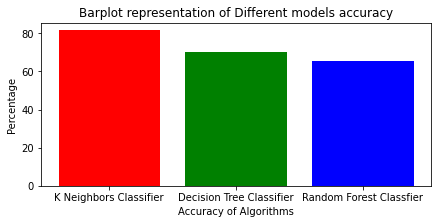

In [106]:
from matplotlib import pyplot as plt
# %matplotlib inline
colors = ['red','green','blue']
plt.figure(figsize=(7,3))
plt.title("Barplot representation of Different models accuracy")
plt.xlabel("Accuracy of Algorithms")
plt.ylabel("Percentage")
plt.bar(model_ev['Model'], model_ev['Accuracy'],color = colors)
plt.show()

In [107]:
num_labels= y.shape[1]